https://towardsdatascience.com/data-visualization-cheat-sheet-with-seaborn-and-matplotlib-part-2-40faf5975c8a

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
df = pd.read_csv('data.csv', encoding="ISO-8859-1",dtype={'CustomerID': str,'InvoiceID': str})
df['Quantity'] = abs(df['Quantity'])
df['Revenue'] = df.Quantity*df.UnitPrice
df_ger = df[df.Country == 'Germany']
df_ger.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany,17.7
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany,15.3
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany,10.2
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany,19.8
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany,23.4


In [10]:
df_ger.info()


<class 'pandas.core.frame.DataFrame'>
Index: 9495 entries, 1109 to 541805
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    9495 non-null   object 
 1   StockCode    9495 non-null   object 
 2   Description  9495 non-null   object 
 3   Quantity     9495 non-null   int64  
 4   InvoiceDate  9495 non-null   object 
 5   UnitPrice    9495 non-null   float64
 6   CustomerID   9495 non-null   object 
 7   Country      9495 non-null   object 
 8   Revenue      9495 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 741.8+ KB


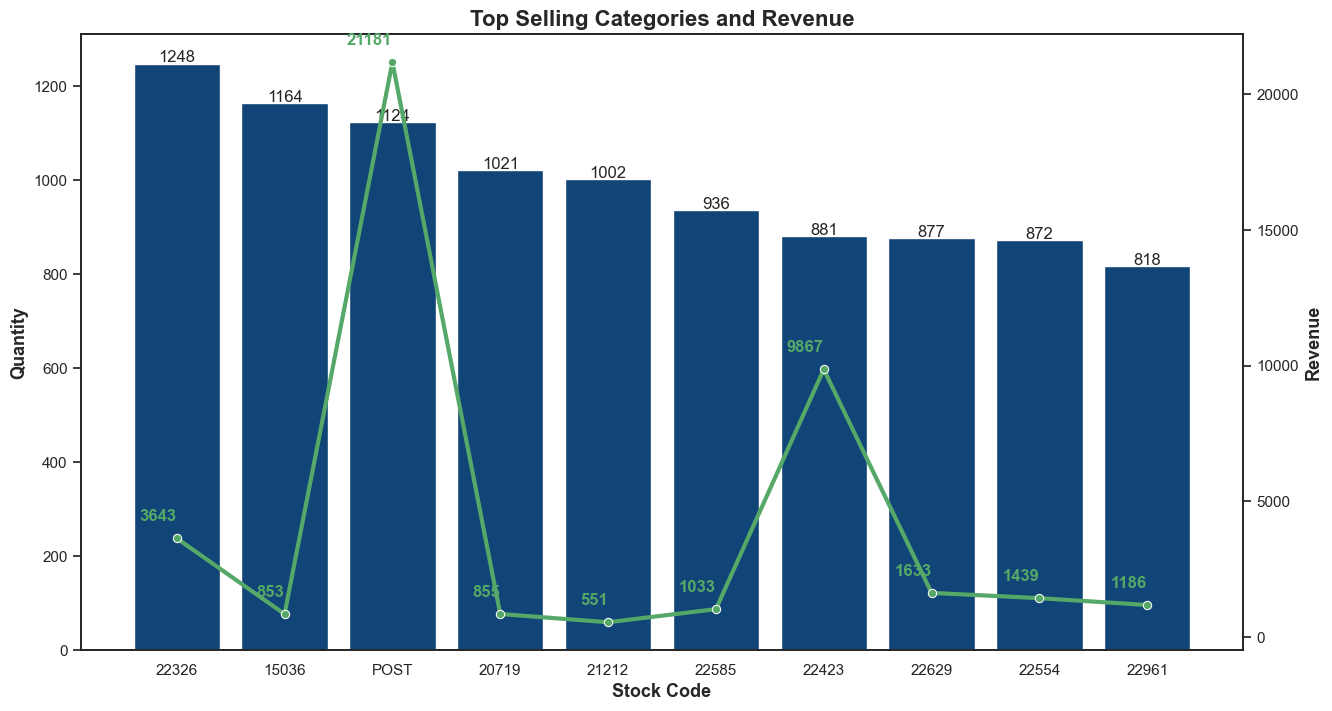

In [11]:
#Transform data for top10 selling categories
df_ger_top10 = df_ger.groupby('StockCode').agg({'Quantity':'sum','Revenue':'sum'}).sort_values(by=['Quantity'], ascending = False).reset_index().head(10)

#Create subplot
sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(15,8))

#Bar chart plot
ax1 = sns.barplot(x= df_ger_top10.StockCode,
            y= df_ger_top10.Quantity, 
            color='#004488',
            ax=ax1)

#Get labels on bar chart
for p in ax1.patches: 
    height =p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{:1.0f}'.format(height),
        ha="center", fontsize=12)
ax1.set_title('Top Selling Categories and Revenue',weight='bold',fontsize=16)
ax1.set_ylabel('Quantity',weight='bold',fontsize=13)
ax1.set_xlabel('Stock Code', weight='bold',fontsize=13)

#Plot line chart on different y-axis
ax2 = ax1.twinx()
ax2 = sns.lineplot(x=df_ger_top10.StockCode, 
             y=df_ger_top10.Revenue, sort = False, 
             color='g',
             marker="o",
             ax=ax2)
ax2.set_ylabel('Revenue',weight='bold',fontsize=13)

#Get labels on line chart
ymin, ymax = ax2.get_ylim()
bonus = (ymax - ymin)/35
for x, y, name in zip(df_ger_top10['StockCode'], round(df_ger_top10['Revenue']), round(df_ger_top10['Revenue']).astype('str').replace('\.0', '', regex=True)):
    ax2.text(x, y + bonus, name, color = 'g', weight = 'bold', ha='right')
plt.show()

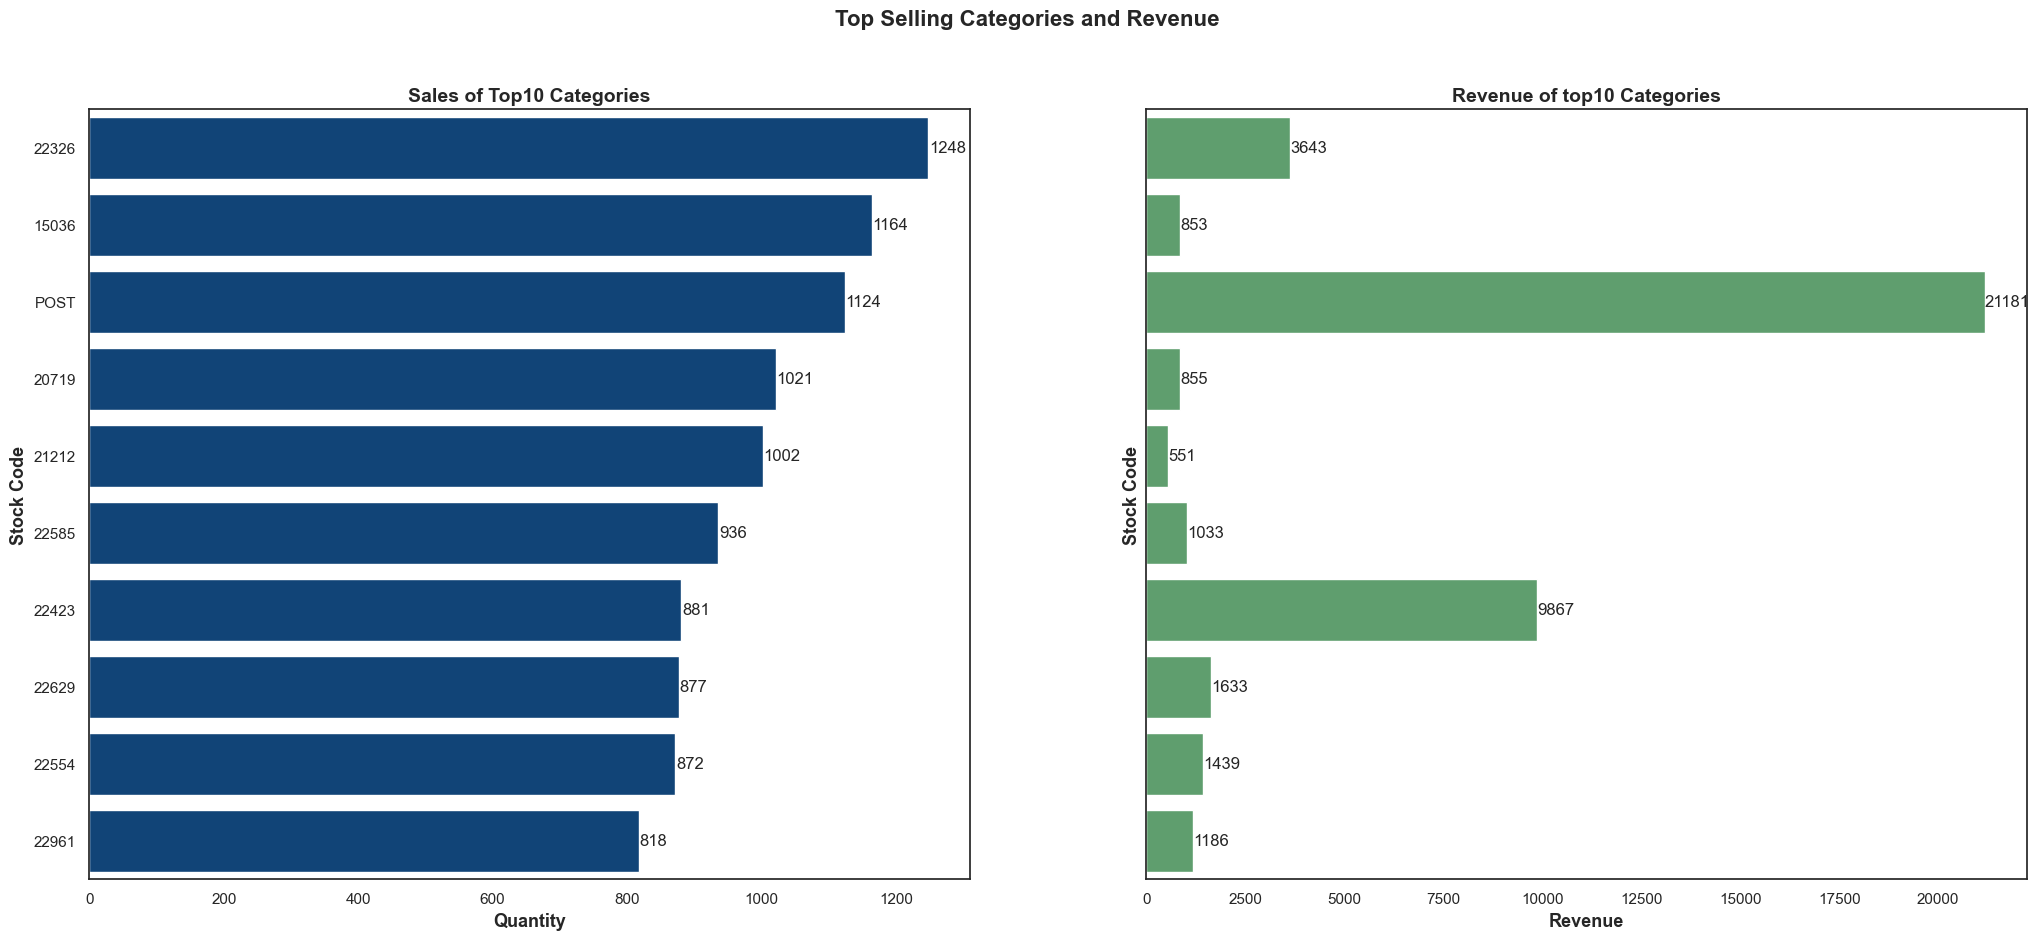

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10), sharey=True)
fig.suptitle('Top Selling Categories and Revenue',weight='bold',fontsize=16)

#Create the plot in position [0,0]
sns.barplot(ax=axes[0], y= df_ger_top10.StockCode,
            x=df_ger_top10.Quantity, 
            color='#004488')
axes[0].set_title('Sales of Top10 Categories',weight='bold',fontsize=14)
axes[0].set_ylabel('Stock Code',weight='bold',fontsize=13)
axes[0].set_xlabel('Quantity', weight='bold',fontsize=13)
for p in axes[0].patches:
    width = p.get_width()    # get bar length
    axes[0].text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

#Create the plot in position [0,1]
sns.barplot(ax=axes[1], y=df_ger_top10.StockCode, 
             x=df_ger_top10.Revenue,
             color='g')
axes[1].set_title('Revenue of top10 Categories',weight='bold',fontsize=14)
axes[1].set_ylabel('Stock Code',weight='bold',fontsize=13)
axes[1].set_xlabel('Revenue', weight='bold',fontsize=13)
for p in axes[1].patches:
    width = p.get_width()    # get bar length
    axes[1].text(width + 1,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.0f}'.format(width), # set variable to display
            ha = 'left',   # horizontal alignment
            va = 'center')  # vertical alignment

In [14]:
#Top 10 consumers with most quantity purchased 
df_consumer = df_ger.groupby('CustomerID')['Quantity'].sum().sort_values(axis=0,ascending=False).reset_index().head(10)
top10 = list(df_consumer.CustomerID) 
#Top 10 consumers with most money paid 
df_rev = df_ger.groupby('CustomerID')['Revenue'].sum().sort_values(axis=0,ascending=False).reset_index().head(10)
top10_rev = list(df_rev.CustomerID)
#Top 10 categories that Top 10 consumers purchased
df_top_cat = df_ger[df_ger.CustomerID.isin(top10)].groupby('StockCode')['Quantity'].sum().sort_values(axis=0,ascending=False).reset_index().head(10)
#Top 10 categories that Top 10 consumers paid most money
df_top_rev = df_ger[df_ger.CustomerID.isin(top10_rev)].groupby('StockCode')['Revenue'].sum().sort_values(axis=0,ascending=False).reset_index().head(10)

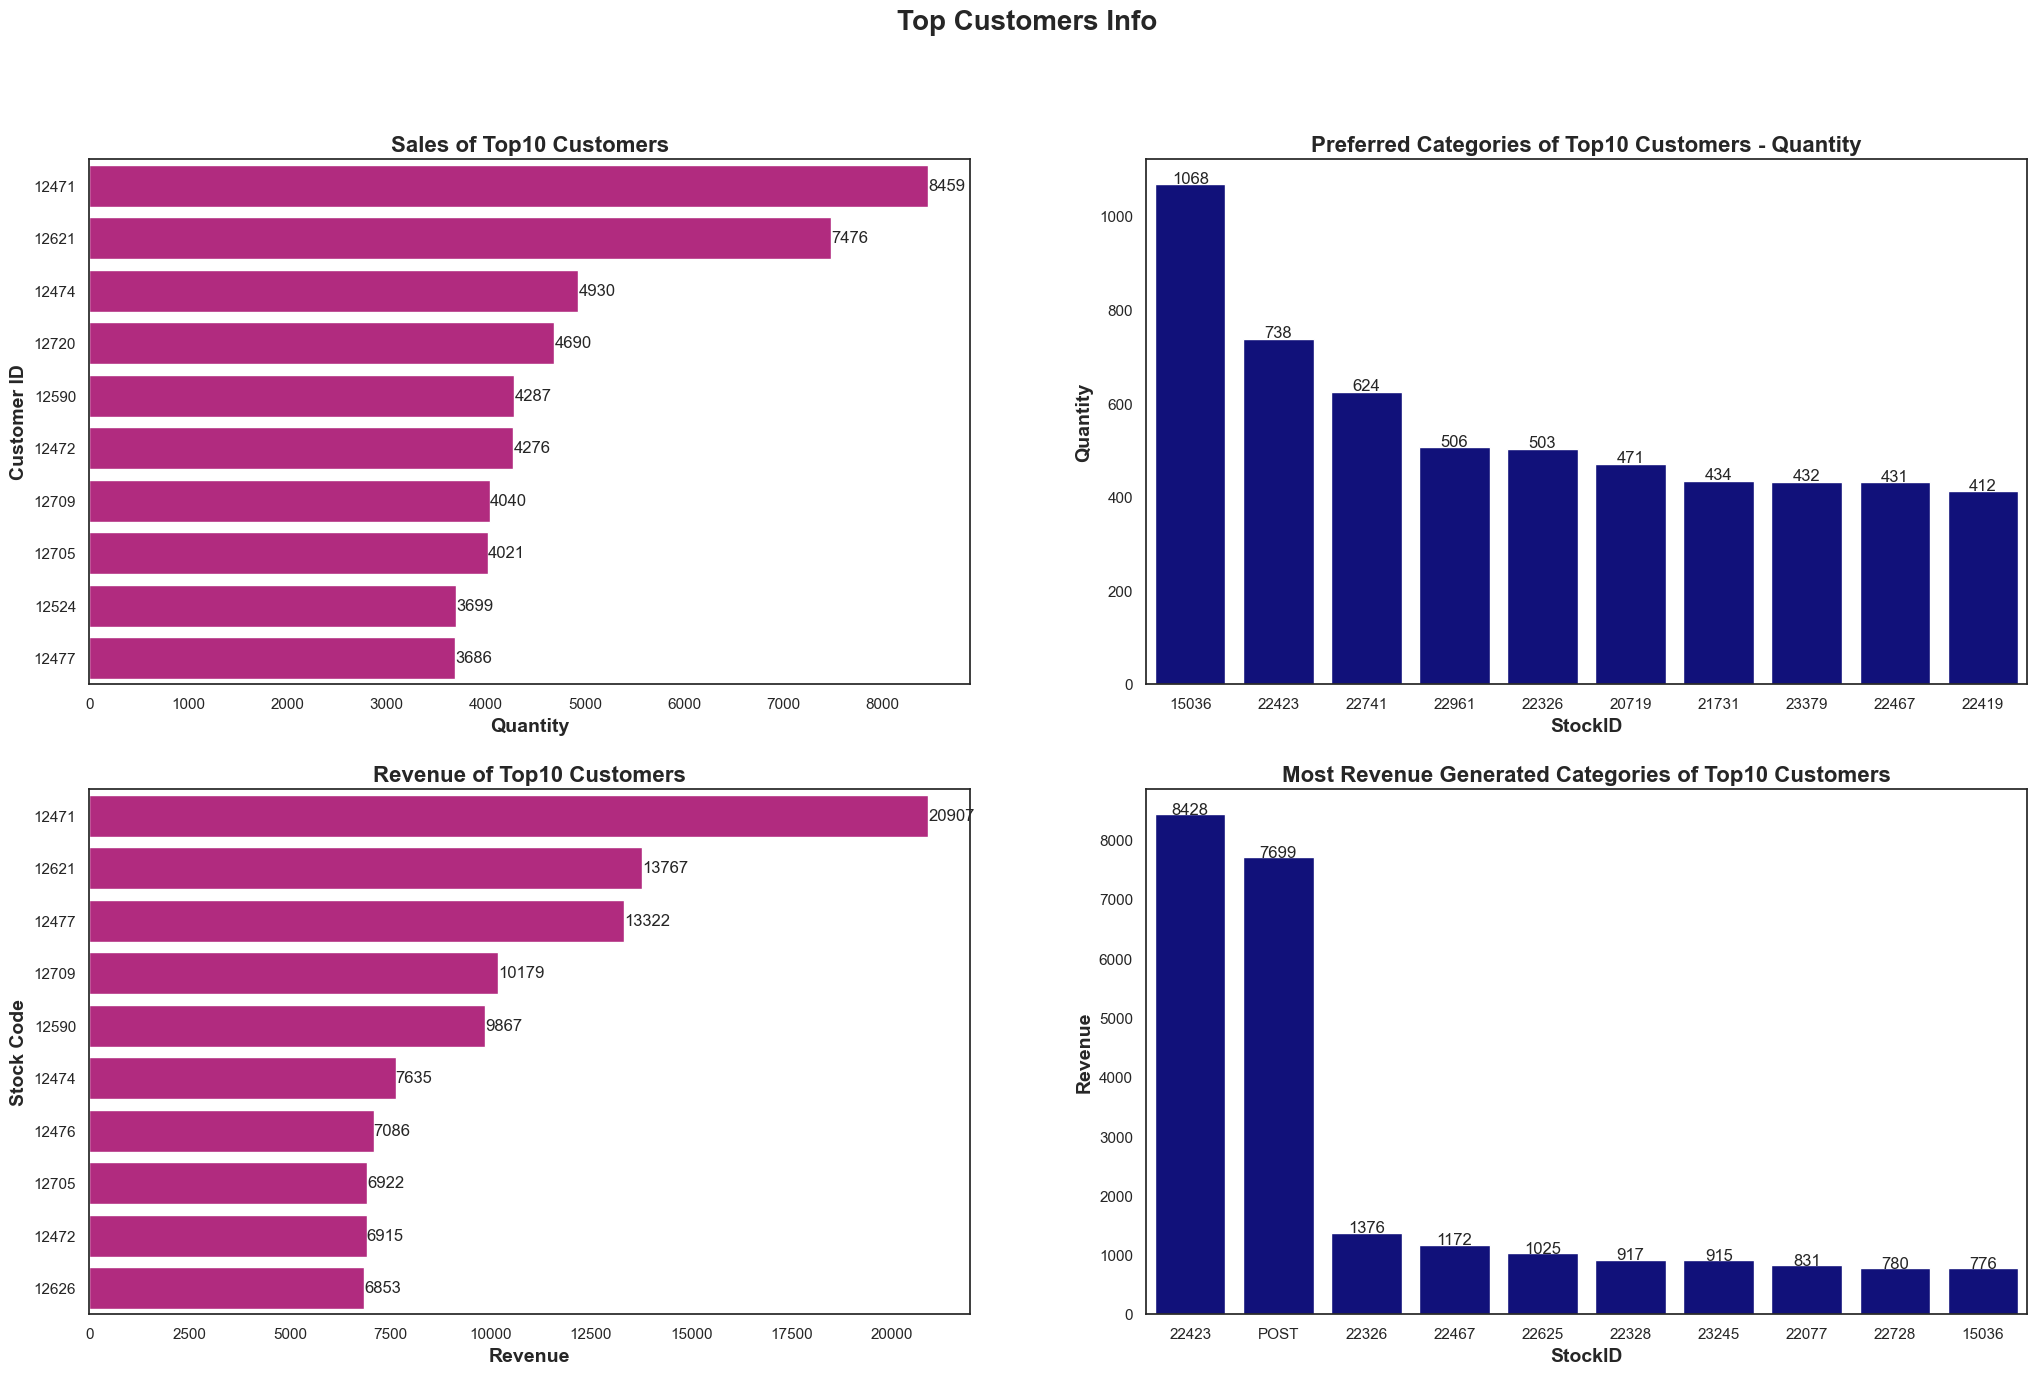

In [15]:
#Create the subplot with 2 rows and 2 columns, not share axis
fig, axes = plt.subplots(2, 2, figsize=(25, 15), sharey=False)
fig.suptitle('Top Customers Info',weight='bold',fontsize=20)

#Position [0,0]
sns.barplot(ax=axes[0,0], y= df_consumer.CustomerID,
            x=df_consumer.Quantity, orient='h', 
            color='mediumvioletred')
axes[0,0].set_title('Sales of Top10 Customers',weight='bold',fontsize=16)
axes[0,0].set_ylabel('Customer ID',weight='bold',fontsize=14)
axes[0,0].set_xlabel('Quantity', weight='bold',fontsize=14)

for p in axes[0,0].patches:
    width = p.get_width()    
    axes[0,0].text(width + 1,     
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width),
            ha = 'left',   
            va = 'center') 

#position [1,0]
sns.barplot(ax=axes[1,0], y= df_rev.CustomerID,
            x=df_rev.Revenue, orient='h', 
            color='mediumvioletred')
axes[1,0].set_title('Revenue of Top10 Customers',weight='bold',fontsize=16)
axes[1,0].set_ylabel('Stock Code',weight='bold',fontsize=14)
axes[1,0].set_xlabel('Revenue', weight='bold',fontsize=14)

for p in axes[1,0].patches:
    width = p.get_width()    
    axes[1,0].text(width + 1,     
            p.get_y() + p.get_height() / 2, 
            '{:1.0f}'.format(width),
            ha = 'left',   
            va = 'center') 

#position [0,1]
sns.barplot(ax=axes[0,1], x= df_top_cat.StockCode,
            y=df_top_cat.Quantity, orient='v', 
            color='darkblue')
axes[0,1].set_title('Preferred Categories of Top10 Customers - Quantity',weight='bold',fontsize=16)
axes[0,1].set_ylabel('Quantity',weight='bold',fontsize=14)
axes[0,1].set_xlabel('StockID', weight='bold',fontsize=14)

for p in axes[0,1].patches: 
    height =p.get_height()
    axes[0,1].text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{:1.0f}'.format(height),
        ha="center", fontsize=12)

#position [1,1]
sns.barplot(ax=axes[1,1], x= df_top_rev.StockCode,
            y=df_top_rev.Revenue, orient='v', 
            color='darkblue')
axes[1,1].set_title('Most Revenue Generated Categories of Top10 Customers',weight='bold',fontsize=16)
axes[1,1].set_ylabel('Revenue',weight='bold',fontsize=14)
axes[1,1].set_xlabel('StockID', weight='bold',fontsize=14)

for p in axes[1,1].patches: 
    height =p.get_height()
    axes[1,1].text(p.get_x()+p.get_width()/2.,
        height + 3,
        '{:1.0f}'.format(height),
        ha="center", fontsize=12)